<a href="https://github.com/zia207/python-colab/blob/main/NoteBook/Python_for_Beginners/01-05-01-data-exploration-basic-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 5.1 Basic Data Exploration and Visualization in Python

This tutorial provides a comprehensive guide to exploratory data analysis (EDA) and visualization using Python. It covers essential concepts, techniques, and tools for importing, cleaning, preprocessing, and visualizing data to gain meaningful insights. You will learn how to manipulate data, perform statistical analyses, and interpret results effectively. Whether you're a beginner or an experienced data analyst, this tutorial equips you with the skills to explore and visualize data using Python.

## Check and Install Required Packages

The following Python libraries will be used in this tutorial:

- `pandas`: For data manipulation and analysis.
- `numpy`: For numerical computations.
- `matplotlib`: For creating static, animated, and interactive visualizations.
- `seaborn`: For statistical data visualization based on matplotlib.
- `scipy`: For scientific and statistical computations.
- `statsmodels`: For statistical modeling and testing.
- `pingouin`: For additional statistical tests.
- `tabulate`: For creating publication-ready tables.
- `missingno`: For visualizing missing data.
- `plotly`: For interactive visualizations.

To install these packages, run the following command in your Python environment:

```bash
pip install pandas numpy matplotlib seaborn scipy statsmodels pingouin tabulate missingno plotly
```

## Verify Installation

To ensure all required packages are installed, you can check their availability:

In [1]:
import pkg_resources

packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy', 'statsmodels', 'pingouin', 'tabulate', 'missingno', 'plotly']
installed = {pkg: pkg_resources.get_distribution(pkg).version for pkg in packages if pkg in [p.key for p in pkg_resources.working_set]}
print("Installed packages:", installed)

Installed packages: {'pandas': '2.3.2', 'numpy': '2.0.2', 'matplotlib': '3.10.5', 'seaborn': '0.13.2', 'scipy': '1.15.1', 'statsmodels': '0.14.5', 'pingouin': '0.5.5', 'tabulate': '0.9.0', 'plotly': '6.3.0'}


/tmp/ipykernel_10796/551413037.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


## Import Packages

Import the required libraries with suppressed warnings for a cleaner output:

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pingouin as pg
from tabulate import tabulate
import missingno as msno
import plotly.express as px

## Data

We will use the same datasets as in the R tutorial, available from GitHub:

In [6]:
# Import datasets
mf_na = pd.read_csv("https://github.com/zia207/r-colab/raw/main/Data/R_Beginners/gp_soil_data_na.csv")
as_df = pd.read_csv("https://github.com/zia207/r-colab/raw/main/Data/R_Beginners/rice_arsenic_data.csv")

## Data Structure

The `info()` method in pandas provides a concise summary of the DataFrame, including column names, data types, and missing values.

In [7]:
# Display data structure
mf_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         471 non-null    int64  
 1   FIPS       471 non-null    int64  
 2   STATE_ID   471 non-null    int64  
 3   STATE      471 non-null    object 
 4   COUNTY     471 non-null    object 
 5   Longitude  471 non-null    float64
 6   Latitude   471 non-null    float64
 7   SOC        467 non-null    float64
 8   DEM        471 non-null    float64
 9   Aspect     471 non-null    float64
 10  Slope      471 non-null    float64
 11  TPI        471 non-null    float64
 12  KFactor    471 non-null    float64
 13  MAP        471 non-null    float64
 14  MAT        471 non-null    float64
 15  NDVI       471 non-null    float64
 16  SiltClay   471 non-null    float64
 17  NLCD       471 non-null    object 
 18  FRG        471 non-null    object 
dtypes: float64(12), int64(3), object(4)
memory usage: 

## Missing Values

Missing values can affect the accuracy of data analysis. The `isna()` method identifies missing values in a DataFrame.

In [8]:
# Total number of missing values
print("Total missing values:", mf_na.isna().sum().sum())

# Column names with missing values
list_na = mf_na.columns[mf_na.isna().any()].tolist()
print("Columns with missing values:", list_na)

Total missing values: 4
Columns with missing values: ['SOC']


## Visualizing Missing Values

The `missingno` library can visualize missing data patterns:

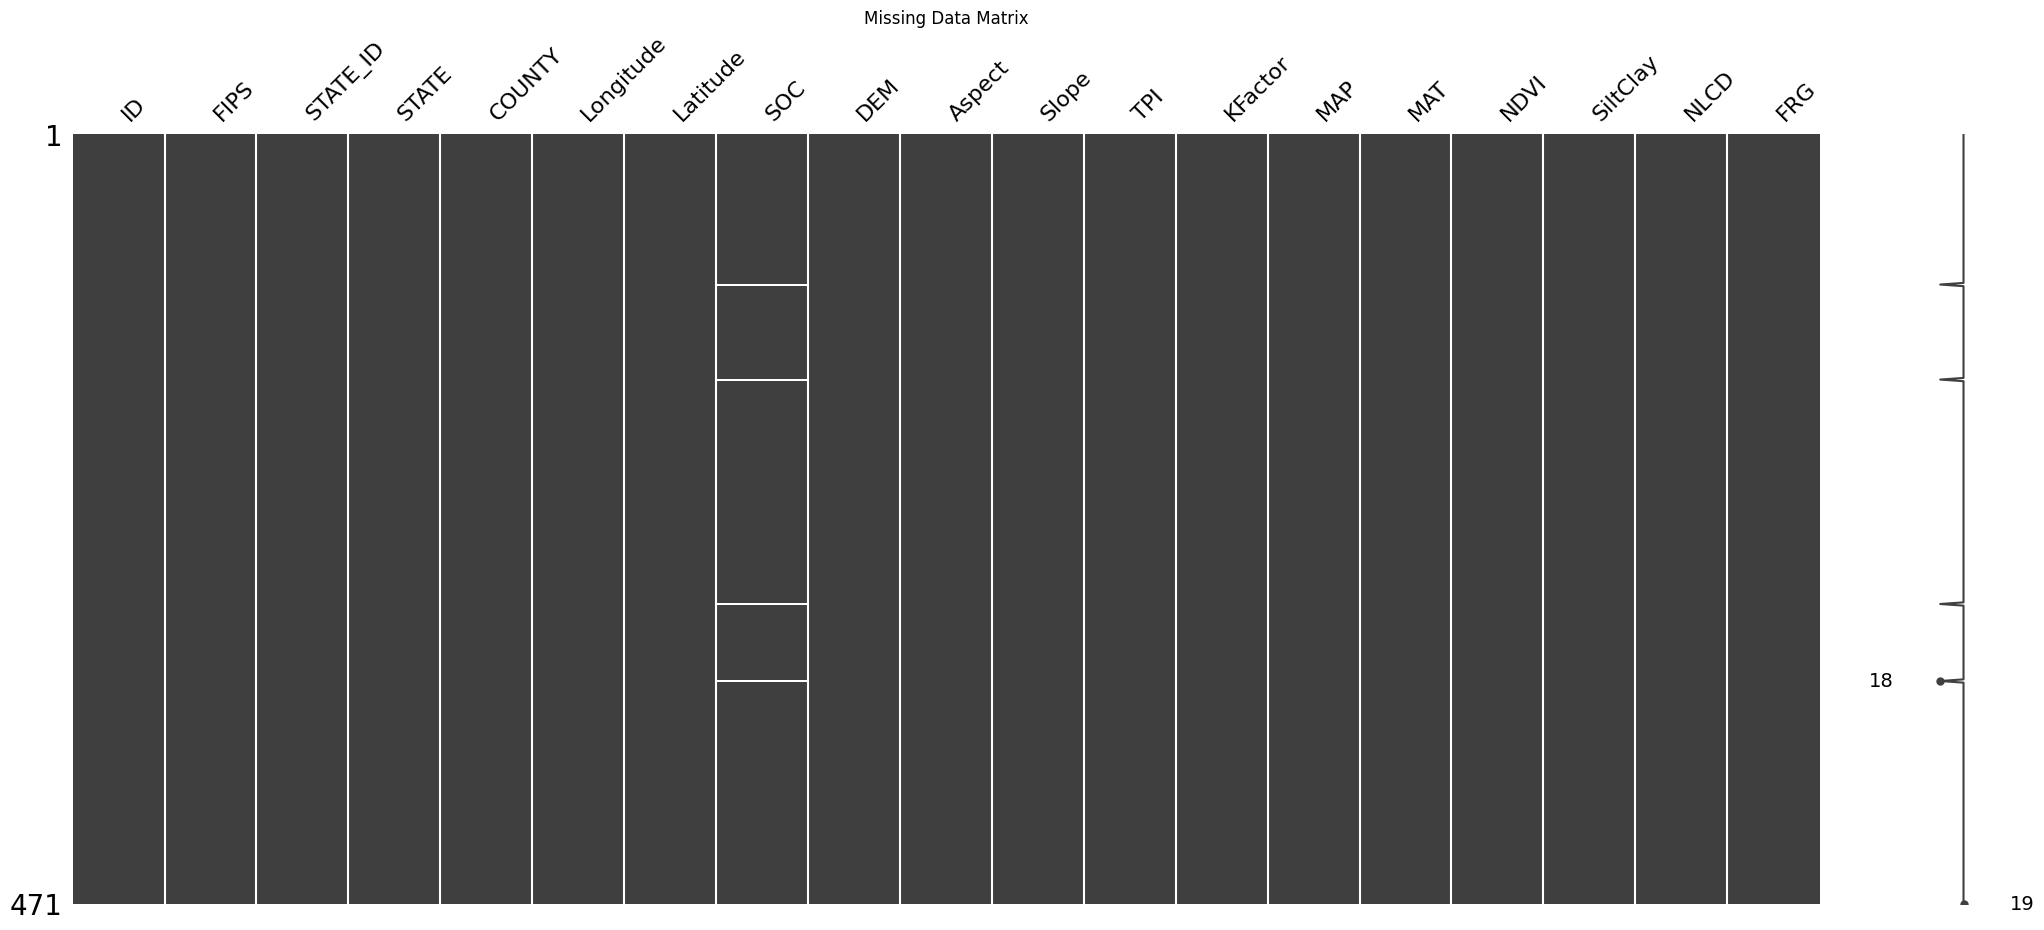

In [9]:
msno.matrix(mf_na)
plt.title("Missing Data Matrix")
plt.show()

## Handling Missing Values

Common strategies for handling missing values include deletion and imputation. Here, we demonstrate both:

### Remove Missing Values

Use `dropna()` to remove rows with missing values:

In [10]:
mf = mf_na.dropna()
print("Total missing values after dropping:", mf.isna().sum().sum())

Total missing values after dropping: 0


### Impute Missing Values

Impute missing values with the median of the column:

In [11]:
# Identify columns with missing values
list_na = mf_na.columns[mf_na.isna().any()].tolist()
# Impute with median
median_missing = mf_na[list_na].median()
mf_imp = mf_na.copy()
for col in list_na:
    mf_imp[col] = mf_imp[col].fillna(median_missing[col])
print(mf_imp.head())

   ID   FIPS  STATE_ID    STATE          COUNTY   Longitude   Latitude  \
0   1  56041        56  Wyoming    Uinta County -111.011860  41.056300   
1   2  56023        56  Wyoming  Lincoln County -110.982973  42.883497   
2   3  56039        56  Wyoming    Teton County -110.806490  44.534970   
3   4  56039        56  Wyoming    Teton County -110.734417  44.432886   
4   5  56029        56  Wyoming     Park County -110.730790  44.806350   

      SOC          DEM      Aspect     Slope       TPI   KFactor         MAP  \
0  15.763  2229.078613  159.187744  5.671615 -0.085724  0.320000  468.324493   
1  15.883  1889.400146  156.878555  8.913812  4.559132  0.261212  536.352173   
2  18.142  2423.048340  168.612350  4.774805  2.605887  0.216200  859.550903   
3  10.745  2484.282715  198.353622  7.121811  5.146931  0.181667  869.472412   
4  10.479  2396.194580  201.321487  7.949864  3.755706  0.125510  802.974304   

        MAT      NDVI   SiltClay       NLCD                   FRG  
0  4.5

## Visual Inspection of Data Distribution

Visualizing data distribution is crucial for understanding patterns, central tendencies, and spread. Common techniques include histograms, kernel density plots, and quantile-quantile (Q-Q) plots.

### Histograms

Histograms display the frequency distribution of numerical data, helping identify patterns, outliers, and skewness.

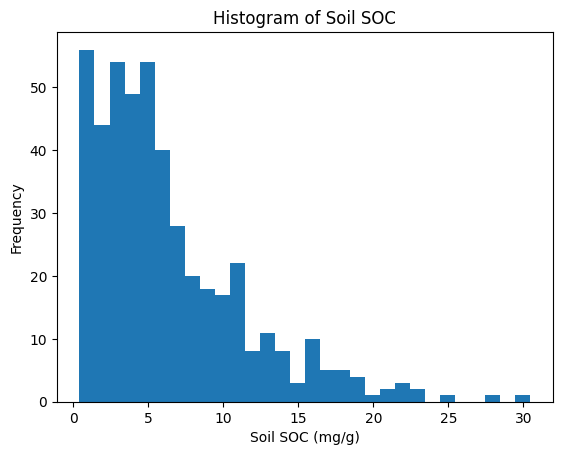

In [12]:
### Using Matplotlib
plt.hist(mf['SOC'], bins=30)
plt.title("Histogram of Soil SOC")
plt.xlabel("Soil SOC (mg/g)")
plt.ylabel("Frequency")
plt.show()

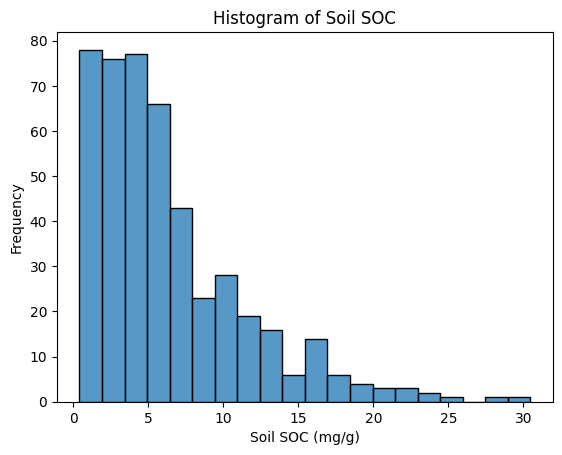

In [13]:
### Using Seaborn
sns.histplot(data=mf, x='SOC')
plt.title("Histogram of Soil SOC")
plt.xlabel("Soil SOC (mg/g)")
plt.ylabel("Frequency")
plt.show()

### Kernel Density Plots

Kernel density plots provide a smoothed estimate of the data's probability density function.

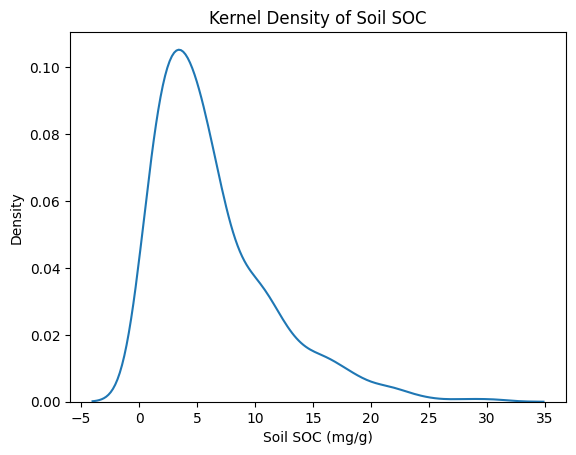

In [14]:
### Using Matplotlib/Seaborn
sns.kdeplot(data=mf, x='SOC')
plt.title("Kernel Density of Soil SOC")
plt.xlabel("Soil SOC (mg/g)")
plt.ylabel("Density")
plt.show()

### Q-Q Plot

Q-Q plots compare the quantiles of a dataset against a theoretical distribution (e.g., normal distribution).

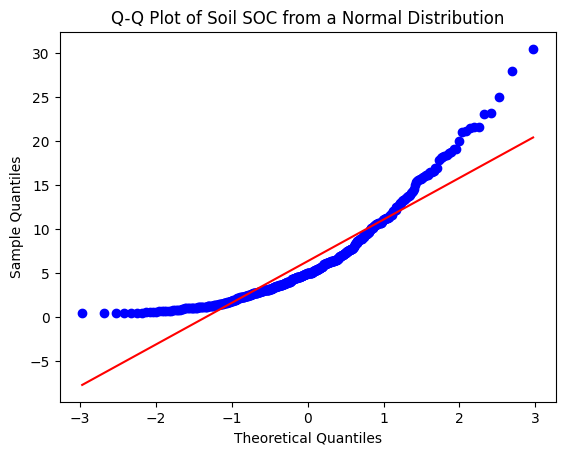

In [15]:
stats.probplot(mf['SOC'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Soil SOC from a Normal Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

## Normality Tests

Normality tests assess whether data follows a normal distribution. Common tests include Shapiro-Wilk, Anderson-Darling, and Kolmogorov-Smirnov.

### Shapiro-Wilk Test

In [16]:
stat, p_value = stats.shapiro(mf['SOC'])
print("Shapiro-Wilk Test:")
print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")

# A p-value < 0.05 suggests the data is not normally distributed.

Shapiro-Wilk Test:
Statistic: 0.8724, p-value: 0.0000


### Anderson-Darling Test

In [17]:
result = stats.anderson(mf['SOC'], dist='norm')
print("Anderson-Darling Test:")
print(f"Statistic: {result.statistic:.4f}")
for i, (crit_val, sig_level) in enumerate(zip(result.critical_values, result.significance_level)):
    print(f"Critical value at {sig_level}%: {crit_val:.4f}")

Anderson-Darling Test:
Statistic: 16.2203
Critical value at 15.0%: 0.5710
Critical value at 10.0%: 0.6510
Critical value at 5.0%: 0.7800
Critical value at 2.5%: 0.9100
Critical value at 1.0%: 1.0830


### Kolmogorov-Smirnov Test

In [18]:
stat, p_value = stats.kstest(mf['SOC'], 'norm', args=(mf['SOC'].mean(), mf['SOC'].std()))
print("Kolmogorov-Smirnov Test:")
print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")

Kolmogorov-Smirnov Test:
Statistic: 0.1369, p-value: 0.0000


## Skewness and Kurtosis

Skewness measures the asymmetry of a distribution, while kurtosis measures its peakedness.

In [19]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(mf['SOC'], nan_policy='omit'))
print("Kurtosis:", kurtosis(mf['SOC'], nan_policy='omit'))

# A high positive skewness indicates a right-skewed distribution, and a high positive kurtosis suggests a peaked distribution.

Skewness: 1.460019473812121
Kurtosis: 2.3884624769147287


## Data Transformation for Normality

Data transformations can help achieve normality by adjusting the data's scale or shape.

### Logarithmic Transformation

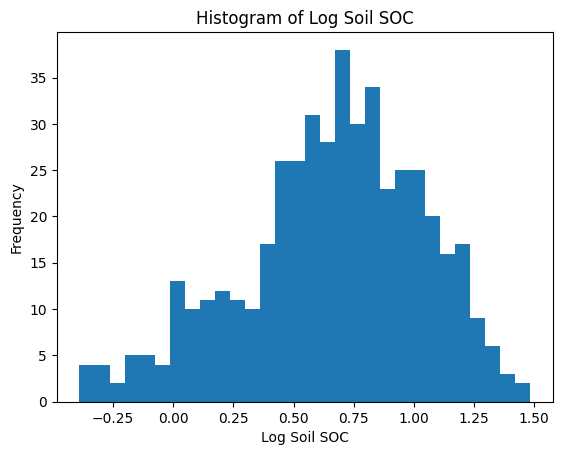

Shapiro-Wilk Test for Log SOC: ShapiroResult(statistic=np.float64(0.9805638571093419), pvalue=np.float64(6.732957080874472e-06))


In [20]:
mf['log_SOC'] = np.log10(mf['SOC'])
plt.hist(mf['log_SOC'], bins=30)
plt.title("Histogram of Log Soil SOC")
plt.xlabel("Log Soil SOC")
plt.ylabel("Frequency")
plt.show()
print("Shapiro-Wilk Test for Log SOC:", stats.shapiro(mf['log_SOC']))

### Square Root Transformation

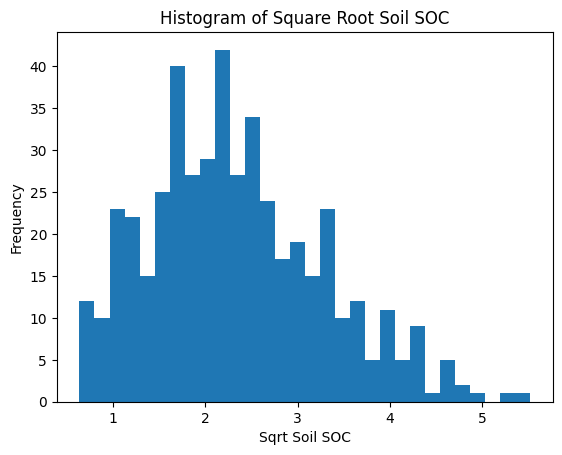

Shapiro-Wilk Test for Sqrt SOC: ShapiroResult(statistic=np.float64(0.974943759073733), pvalue=np.float64(3.5054753480453214e-07))


In [21]:
mf['sqrt_SOC'] = np.sqrt(mf['SOC'])
plt.hist(mf['sqrt_SOC'], bins=30)
plt.title("Histogram of Square Root Soil SOC")
plt.xlabel("Sqrt Soil SOC")
plt.ylabel("Frequency")
plt.show()
print("Shapiro-Wilk Test for Sqrt SOC:", stats.shapiro(mf['sqrt_SOC']))

### Inverse Transformation

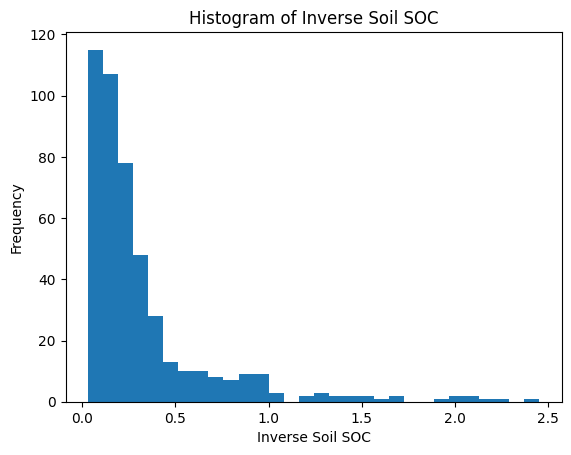

Shapiro-Wilk Test for Inverse SOC: ShapiroResult(statistic=np.float64(0.6685071021650008), pvalue=np.float64(3.588134413582512e-29))


In [22]:
mf['inv_SOC'] = 1 / mf['SOC']
plt.hist(mf['inv_SOC'], bins=30)
plt.title("Histogram of Inverse Soil SOC")
plt.xlabel("Inverse Soil SOC")
plt.ylabel("Frequency")
plt.show()
print("Shapiro-Wilk Test for Inverse SOC:", stats.shapiro(mf['inv_SOC']))

### Box-Cox Transformation

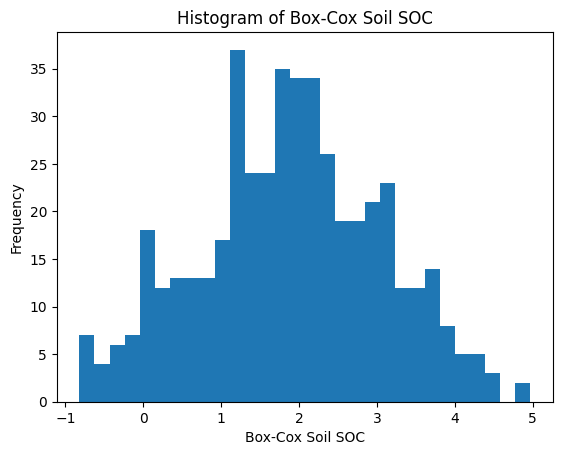

Box-Cox Lambda: 0.2072522833639624
Shapiro-Wilk Test for Box-Cox SOC: ShapiroResult(statistic=np.float64(0.9939332994728381), pvalue=np.float64(0.05912264058046203))


In [23]:
from scipy.stats import boxcox

mf['bc_SOC'], lambda_param = boxcox(mf['SOC'])
plt.hist(mf['bc_SOC'], bins=30)
plt.title("Histogram of Box-Cox Soil SOC")
plt.xlabel("Box-Cox Soil SOC")
plt.ylabel("Frequency")
plt.show()
print("Box-Cox Lambda:", lambda_param)
print("Shapiro-Wilk Test for Box-Cox SOC:", stats.shapiro(mf['bc_SOC']))

## Outliers

Outliers are data points significantly different from others, potentially skewing analysis results.

### Visual Inspection with Boxplot

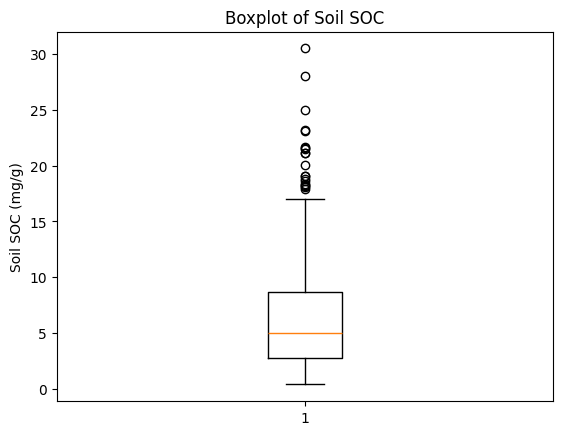

In [24]:
### Using Matplotlib
plt.boxplot(mf['SOC'])
plt.title("Boxplot of Soil SOC")
plt.ylabel("Soil SOC (mg/g)")
plt.show()

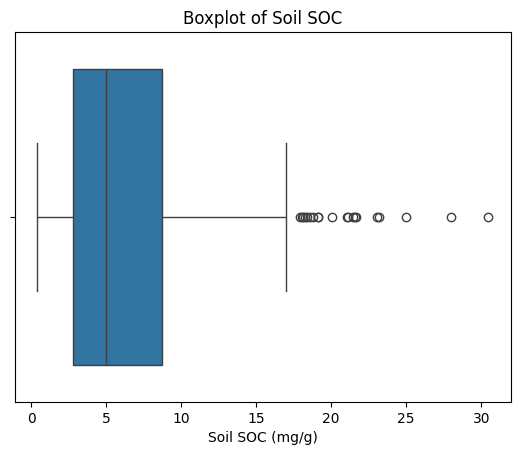

In [25]:
### Using Seaborn
sns.boxplot(x=mf['SOC'])
plt.title("Boxplot of Soil SOC")
plt.xlabel("Soil SOC (mg/g)")
plt.show()

### Count Outliers

In [26]:
Q1 = mf['SOC'].quantile(0.25)
Q3 = mf['SOC'].quantile(0.75)
IQR = Q3 - Q1
outliers = mf['SOC'][(mf['SOC'] < (Q1 - 1.5 * IQR)) | (mf['SOC'] > (Q3 + 1.5 * IQR))]
print("Number of outliers:", len(outliers))

Number of outliers: 20


### Box-Jitter Plot

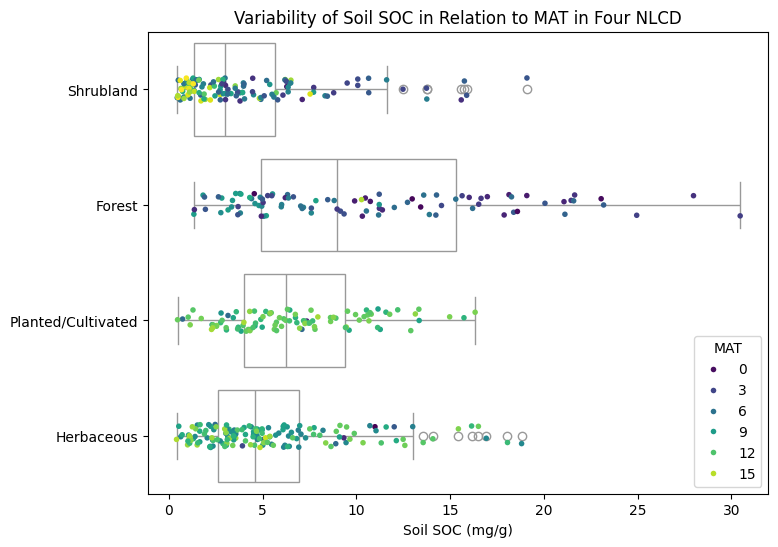

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='NLCD', x='SOC', data=mf, color='white')
sns.stripplot(y='NLCD', x='SOC', hue='MAT', size=4, palette='viridis', data=mf, jitter=True)
plt.title("Variability of Soil SOC in Relation to MAT in Four NLCD")
plt.xlabel("Soil SOC (mg/g)")
plt.ylabel("")
plt.legend(title="MAT")
plt.show()

### Tukey's Method

In [28]:
def detect_outliers(x):
    if not np.issubdtype(x.dtype, np.number):
        raise ValueError("Data provided must be numeric")
    Q1 = np.quantile(x, 0.25)
    Q3 = np.quantile(x, 0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    lower_outliers = x[x < lower_limit]
    upper_outliers = x[x > upper_limit]
    print(f"Lower Limit: {lower_limit}")
    print(f"Upper Limit: {upper_limit}")
    print(f"Lower range outliers: {lower_outliers.values}")
    print(f"Upper range outliers: {upper_outliers.values}")

detect_outliers(mf['SOC'])

Lower Limit: -6.1465000000000005
Upper Limit: 17.6295
Lower range outliers: []
Upper range outliers: [18.142 24.954 21.455 21.644 19.092 21.076 30.473 18.391 20.061 21.125
 18.591 19.099 17.884 21.591 18.277 27.984 18.814 23.058 23.19  18.062]


### Z-Score Method

In [29]:
from scipy.stats import zscore

z_scores = zscore(mf['SOC'])
outliers = mf['SOC'][np.abs(z_scores) > 3]
print("Outliers using Z-score method:", outliers.values)

Outliers using Z-score method: [24.954 21.644 30.473 21.591 27.984 23.058 23.19 ]


## Descriptive Statistics

Descriptive statistics summarize dataset characteristics, including measures of central tendency and dispersion.

In [30]:
# Basic summary statistics
print(mf.describe())

               ID          FIPS    STATE_ID   Longitude    Latitude  \
count  467.000000    467.000000  467.000000  467.000000  467.000000   
mean   237.880086  29150.856531   29.096360 -104.477342   38.861363   
std    136.801062  18391.875465   18.415021    3.998457    3.224902   
min      1.000000   8001.000000    8.000000 -111.011860   31.506370   
25%    120.500000   8109.000000    8.000000 -107.538715   37.188095   
50%    238.000000  20193.000000   20.000000 -105.309630   38.753447   
75%    356.500000  56001.000000   56.000000 -102.592520   41.039265   
max    473.000000  56045.000000   56.000000  -94.915421   44.989732   

              SOC          DEM      Aspect       Slope         TPI  \
count  467.000000   467.000000  467.000000  467.000000  467.000000   
mean     6.350762  1632.027701  165.337358    4.839891    0.009365   
std      5.045409   770.287685   24.383587    4.703143    3.578299   
min      0.408000   258.648804   86.894569    0.649253  -26.708651   
25%      2

### Summary Table with Pandas

In [35]:
summary_stat = mf[['SOC', 'DEM', 'Slope', 'Aspect', 'TPI', 'KFactor', 'MAP', 'MAT', 'NDVI', 'SiltClay']].agg(
    ['min', 'quantile', 'median', 'max', 'mean', 'std']
).round(2).T.reset_index()
summary_stat.columns = ['Variable', 'Min', 'Quantile ', 'Median',  'Max', 'Mean', 'SD']
print(tabulate(summary_stat, headers='keys', tablefmt='pretty'))

+---+----------+--------+-----------+---------+---------+---------+--------+
|   | Variable |  Min   | Quantile  | Median  |   Max   |  Mean   |   SD   |
+---+----------+--------+-----------+---------+---------+---------+--------+
| 0 |   SOC    |  0.41  |   4.97    |  4.97   |  30.47  |  6.35   |  5.05  |
| 1 |   DEM    | 258.65 |  1592.89  | 1592.89 | 3618.02 | 1632.03 | 770.29 |
| 2 |  Slope   |  0.65  |   2.73    |  2.73   |  26.1   |  4.84   |  4.7   |
| 3 |  Aspect  | 86.89  |  164.04   | 164.04  | 255.83  | 165.34  | 24.38  |
| 4 |   TPI    | -26.71 |   -0.04   |  -0.04  |  16.71  |  0.01   |  3.58  |
| 5 | KFactor  |  0.05  |   0.28    |  0.28   |  0.43   |  0.26   |  0.09  |
| 6 |   MAP    | 193.91 |   433.8   |  433.8  | 1128.11 | 500.85  | 207.09 |
| 7 |   MAT    | -0.59  |   9.17    |  9.17   |  16.87  |  8.88   |  4.1   |
| 8 |   NDVI   |  0.14  |   0.42    |  0.42   |   0.8   |  0.44   |  0.16  |
| 9 | SiltClay |  9.16  |   52.19   |  52.19  |  89.83  |  53.81  | 17.21  |

### Summary Statistics by Group

In [36]:
summarise_soc = mf.groupby('NLCD')['SOC'].agg(
    Mean='mean',
    Median='median',
    Min='min',
    Max='max',
    SD='std',
    SE=lambda x: x.std() / np.sqrt(len(x))
).round(3).reset_index()
print(tabulate(summarise_soc, headers='keys', tablefmt='pretty'))

+---+--------------------+--------+--------+-------+--------+-------+-------+
|   |        NLCD        |  Mean  | Median |  Min  |  Max   |  SD   |  SE   |
+---+--------------------+--------+--------+-------+--------+-------+-------+
| 0 |       Forest       | 10.431 | 8.974  | 1.333 | 30.473 | 6.802 | 0.705 |
| 1 |     Herbaceous     | 5.477  | 4.609  | 0.408 | 18.814 | 3.925 | 0.32  |
| 2 | Planted/Cultivated | 6.697  |  6.23  | 0.462 | 16.336 | 3.598 | 0.365 |
| 3 |     Shrubland      | 4.131  | 2.996  | 0.446 | 19.099 | 3.745 | 0.332 |
+---+--------------------+--------+--------+-------+--------+-------+-------+


### Barplot

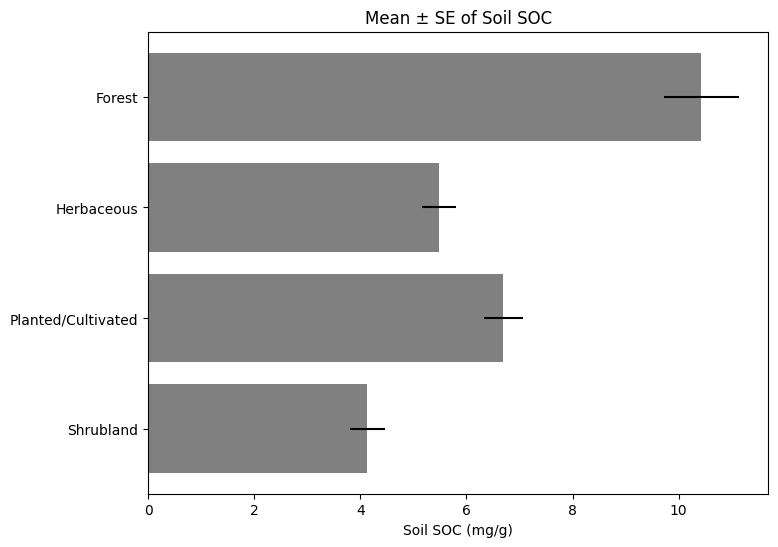

In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Mean', y='NLCD', data=summarise_soc, color='gray')
plt.errorbar(y=summarise_soc.index, x=summarise_soc['Mean'], xerr=summarise_soc['SE'], fmt='none', c='black')
plt.title("Mean ± SE of Soil SOC")
plt.xlabel("Soil SOC (mg/g)")
plt.ylabel("")
plt.show()

## T-Test

### One-Sample T-Test

In [38]:
np.random.seed(42)
sample_data = as_df['GAs'].sample(50)
sample_mean = sample_data.mean()
population_mean = as_df['GAs'].mean()
t_stat, p_value = stats.ttest_1samp(sample_data, population_mean)
print("One-Sample T-Test:")
print(f"Sample Mean: {sample_mean:.3f}")
print(f"Population Mean: {population_mean:.3f}")
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

One-Sample T-Test:
Sample Mean: 1.269
Population Mean: 1.360
T-statistic: -1.337, p-value: 0.187


### Two-Sample T-Test

In [39]:
low = as_df[as_df['TREAT_ID'] == 1]['GY']
high = as_df[as_df['TREAT_ID'] == 2]['GY']
t_stat, p_value = stats.ttest_rel(low, high, alternative='greater')
print("Two-Sample T-Test:")
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

Two-Sample T-Test:
T-statistic: 12.472, p-value: 0.000


## Summary and Conclusion

This tutorial provides a comprehensive guide to exploratory data analysis and visualization in Python, leveraging powerful libraries like pandas, matplotlib, seaborn, and scipy. It covers data import, cleaning, visualization, and statistical analysis, enabling users to uncover patterns, trends, and outliers in their datasets. Visualization techniques, including histograms, density plots, Q-Q plots, and boxplots, are demonstrated to enhance data understanding. Statistical tests and transformations ensure robust analysis, while summary tables and plots facilitate clear communication of findings. Practitioners are encouraged to experiment with diverse datasets and visualization techniques to deepen their data exploration skills.

## References

- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn Documentation](https://seaborn.pydata.org/documentation.html)
- [SciPy Documentation](https://docs.scipy.org/doc/scipy/)
- [Statsmodels Documentation](https://www.statsmodels.org/stable/index.html)